In [41]:
#Exersise 1

import pandas as pd
import numpy as np

row_names = ['A', 'B', 'C', 'D', 'E']
column_names = ['Col1', 'Col2', 'Col3', 'Col4']

data = np.random.randn(len(row_names), len(column_names))
df = pd.DataFrame(data, index=row_names, columns=column_names)

print("Generated DataFrame:\n")
print(df)

print("\nShape of the DataFrame:")
print(df.shape)

print("\nSummary statistics:")
print(df.describe())

Generated DataFrame:

       Col1      Col2      Col3      Col4
A  2.060748  1.755341 -0.248964  0.971571
B  0.645376  1.368632 -0.964923  0.686051
C  1.058424 -1.758739 -1.183259 -2.039232
D -0.269407  0.717542  1.502357  0.074095
E  1.628616 -1.380101 -1.703382 -0.055548

Shape of the DataFrame:
(5, 4)

Summary statistics:
           Col1      Col2      Col3      Col4
count  5.000000  5.000000  5.000000  5.000000
mean   1.024751  0.140535 -0.519634 -0.072613
std    0.902475  1.609995  1.245156  1.178484
min   -0.269407 -1.758739 -1.703382 -2.039232
25%    0.645376 -1.380101 -1.183259 -0.055548
50%    1.058424  0.717542 -0.964923  0.074095
75%    1.628616  1.368632 -0.248964  0.686051
max    2.060748  1.755341  1.502357  0.971571


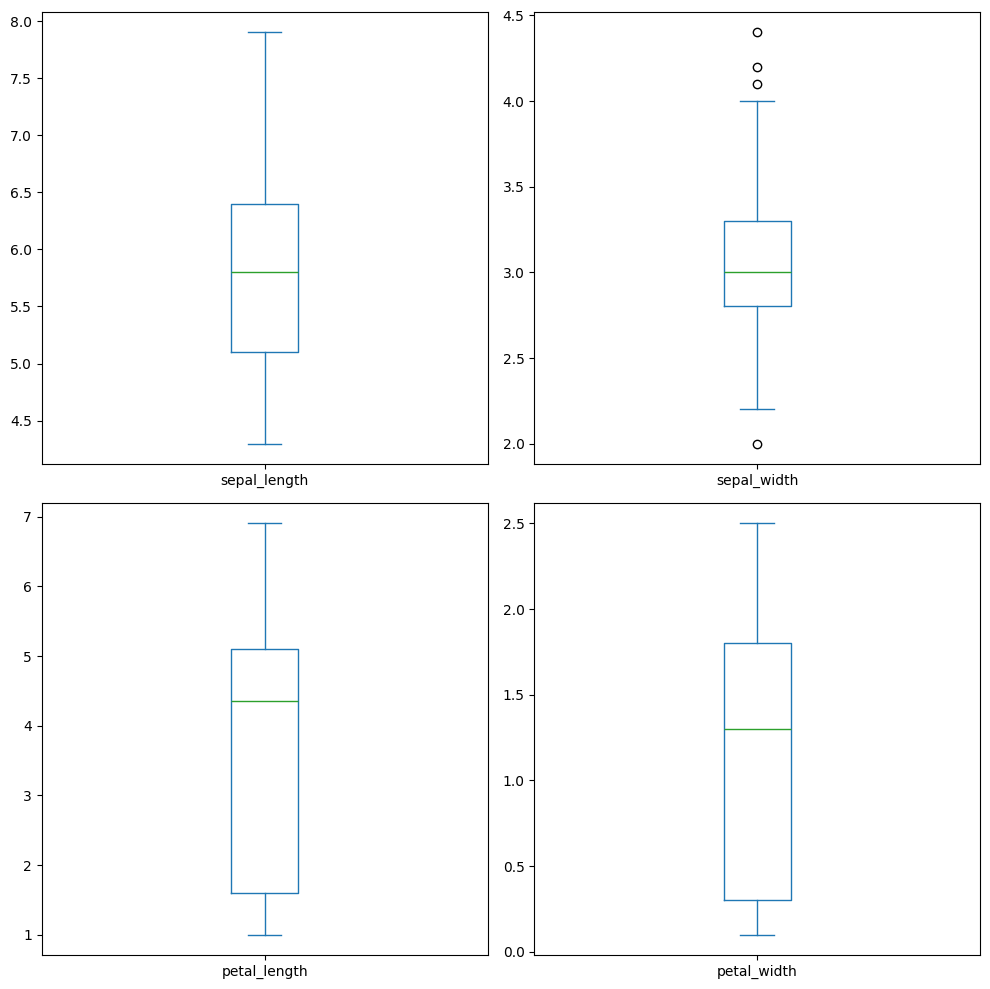

In [ ]:
#Exersie 2
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

iris.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10))
plt.tight_layout()
plt.show()

In [ ]:
#Exersie 3
import seaborn as sns
import plotly.express as px

tips = sns.load_dataset("tips")

fig = px.sunburst(tips, path=['sex', 'day', 'time'], values='tip')
fig.show()

/home/codespace/.local/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/codespace/.local/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/codespace/.local/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
#Exersie 4
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

tips = sns.load_dataset("tips")

X = tips[['total_bill']]  
y = tips['tip']           

model = LinearRegression()
model.fit(X, y)

bill_amount = np.array([[50]])
predicted_tip = model.predict(bill_amount)

print(f"Predicted tip for a £50 bill: ${predicted_tip[0]:.2f}")

Predicted tip for a £50 bill: $6.17


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Model accuracy: 0.7191011235955056
Prediction for single person: Survived


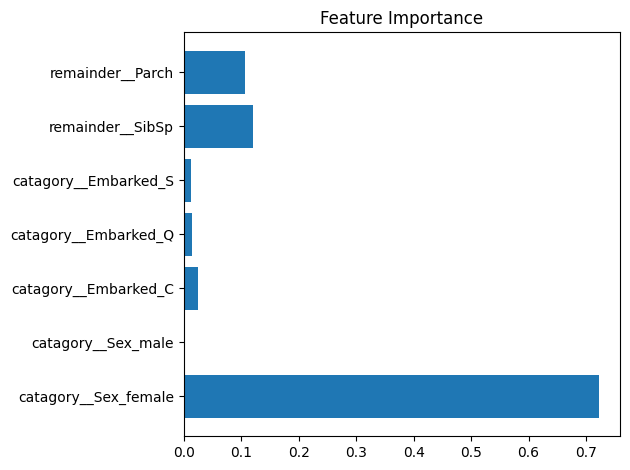

In [211]:
#Exersise 5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load Titanic dataset
url = 'https://raw.githubusercontent.com/Koldim2001/test_api/refs/heads/main/titanic.csv'
df = pd.read_csv(url)

# Select needed columns
df = df[['Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']].dropna()

# Features and target
X = df[['Sex', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

# One-hot encode categorical features
catagories_cols = ['Sex', 'Embarked']
preprocessor = ColumnTransformer([
    ('catagory', OneHotEncoder(), catagories_cols)
], remainder='passthrough')

# Decision Tree pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=0))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit model
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))

# Predict for a single sample
sample = pd.DataFrame([{
    'Sex': 'female',
    'SibSp': 1,
    'Parch': 0,
    'Embarked': 'S'
}])
pred = model.predict(sample)
print("Prediction for single person:", "Survived" if pred[0] == 1 else "Did not survive")

# Feature importances
importances = model.named_steps['tree'].feature_importances_
features = model.named_steps['prep'].get_feature_names_out()
plt.barh(features, importances)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()